# 2. 지도 학습
- 입력과 출력 샘플 데이터 
- 주어진 입력으로부터 출력을 예측 

## 2.1 분류와 회귀
- __분류__ : 클래스 레이블 중 하나를 예측 
  - 두 개의 클래스로 분류하는 __이진 분류__  
    질문의 답이 예/아니오만 나올 수 있도록 하는 것
    ex. 이메일에서 스팸을 분류  
    이진 분류에서 한 클래스를 __양성__ 클래스, 다른 하나를 __음성__ 클래스라고도 함 
  - 셋 이상의 클래스로 분류하는 __다중 분류__ 
 
  
- __회귀__ : 부동소수점수를 예측
  - 출력 값에 연속성이 있다면 회귀 문제  
    ex. 연소득을 예측하는 경우 40,000,000원을 예측하는 것과 40,000,001원을 예측하는 것은 크게 다르지 않음
    
    
## 2.2 일반화, 과대적합, 과소적합
- 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련 세트에서 테스트 세트로 __일반화__되었다고 함  
- 아주 복잡한 모델을 만든다면 훈련 세트에만 정확한 모델이 될 수 있음  
- 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것을 __과대적합__이라 하고,  
  너무 간단한 모델이 선택되는 것을 __과소적합__이라 함  
  
### 2.2.1 모델 복잡도와 데이터셋 크기의 관계
- 다양한 데이터 포인트가 많을수록 과대적합 없이 더 복잡한 모델을 만들 수 있음  
- 실제 환경에서는 데이터를 얼마나 많이 모을지 정해야 함

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import warnings
warnings.filterwarnings(action='ignore')

## 2.3 지도 학습 알고리즘

### 2.3.1 예제에 사용할 데이터셋

__forge 데이터셋__
- 인위적으로 만든 이진 분류 데이터셋
- 26개의 데이터 포인트와 2개의 특성

X.shape: (26, 2)


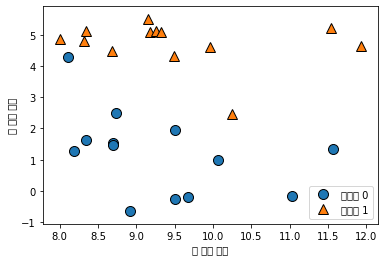

In [2]:
# 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()
# 산점도를 그립니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape)

__wave__ 데이터셋  
- 인위적으로 만든 데이터셋  
- 회귀 알고리즘에 사용
- 입력 특성 하나와 모델링할 타깃 변수

Text(0, 0.5, '타깃')

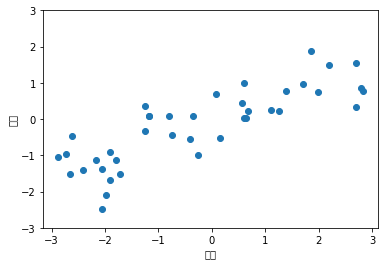

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

__위스콘신 유방암__ 데이터셋  
- 각 종양은 양성과 악성으로 레이블되어 있음  
- 조직 데이터를 기반으로 종양이 악성인지 예측

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())
print("\n유방암 데이터의 형태:", cancer.data.shape)
print("\n클래스별 샘플 개수:\n",{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
print("\n특성 이름:\n", cancer.feature_names)

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

유방암 데이터의 형태: (569, 30)

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


__보스턴 주택가격__ 데이터셋
- 1970년대 보스턴 주변의 주택 평균 가격을 예측

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:", boston.data.shape)

데이터의 형태: (506, 13)


- 13개의 입력 특성뿐 아니라 특성끼리 곱한 것 또한 특성으로 간주  
  ex. 범죄율과 고속도로 접근성의 개별 특성은 물론, 범죄율과 고속도로 접근성의 곱도 특성으로 생각  
- 이처럼 특성을 유도해내는 것을 __특성 공학__이라고 함

In [6]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)
